<a href="https://colab.research.google.com/github/Gideon-Weasley/Machine_Learning/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [158]:
# Create a model class that inherits nn.module
class myModel(nn.Module):
 #using the iris dataset -4 features for input layer -> hidden layer1 (h1) ->hidden layer h2->output (3 classes of iris flowers)
 def __init__(self,in_features=4,h1=8,h2=9, out_features=3):
  super().__init__()  # instantiate nn.Module
  self.fc1 =nn.Linear(in_features,h1) #linear transformation is applied the in_features=no. of features from input layer to hidden layer 1
  # linear transformation -> y = xW.T + b
  self.fc2=nn.Linear(h1,h2) # linear transformation from h1 to h2
  self.out=nn.Linear(h2,out_features)  #linear transformation from h2 to output layer

 def forward(self,x):
  x=F.relu(self.fc1(x))
  x=F.relu(self.fc2(x))
  x=self.out(x)

  return x


In [159]:
#pick a random seed for rantorch.domization
torch.manual_seed(33)
#Create an instance of  the model
model=myModel()
print(model)

myModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)


In [160]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# for charts

In [161]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)
my_df  #dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [162]:
my_df['species']=my_df['species'].replace('setosa',0.0)  #replacing the name with a number -for machine learning - data as number
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)
my_df.head(10)

<ipython-input-162-866310319586>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [163]:
# Train Test split set X,y
X=my_df.drop('species',axis=1)  # dropping the last column - which is the output
y=my_df['species']

#convert these into numpy arrays
X=X.values
y=y.values

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
# Train test split ratio= 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [166]:
#converting it all to tensor for putorch
# FloatTensor bcz all the feature values are float if int - Tensor should do
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
# y values are converted to long as we dont necessarily need the output as decimal - we only care if they are 0/1/2
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [167]:
#set the criterion of model to measure the error , how far off the predictions ar from the data
criterion=nn.CrossEntropyLoss()
#sets the loss function (or criterion) for your model. This is how the model measures how far off its predictions are from the actual labels, during training.
#crosss entropy loss is generally applied for multi class classification problems

#chose optimizer, and learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)  #here we can add additional parameters like weight decay

In [168]:
#Train our model
epoch = 100
losses=[] # for entering losses - to know if our model is learning
for i in range(epoch):
  y_pred = model.forward(X_train) #get predicted results
  loss= criterion(y_pred,y_train) #measure the loss against our original value
  losses.append(loss.detach().numpy())

  if i%10 ==0:
    print(f'epoch: {i} and loss: {loss}')
  #do some back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 and loss: 1.1880278587341309
epoch: 10 and loss: 1.135541319847107
epoch: 20 and loss: 1.1034095287322998
epoch: 30 and loss: 1.0848157405853271
epoch: 40 and loss: 1.0726505517959595
epoch: 50 and loss: 1.0634324550628662
epoch: 60 and loss: 1.0548014640808105
epoch: 70 and loss: 1.044620156288147
epoch: 80 and loss: 1.0321396589279175
epoch: 90 and loss: 1.0165246725082397


Text(0.5, 0, 'Epoch')

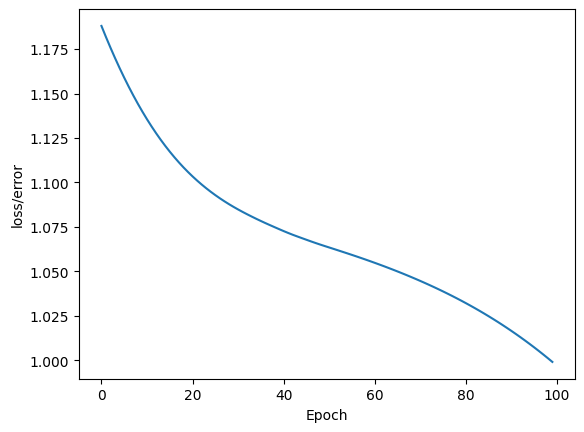

In [169]:
#Graph it out
plt.plot(range(epoch),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [170]:
#Evaluating on test data set
with torch.no_grad(): # turn off back propogation
 y_eval = model.forward(X_test)  #X_test are features from test set and y_eval will be the results
 loss=criterion(y_eval,y_test)
loss

tensor(0.9913)

In [171]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val=model.forward(data)

#will tell us what iris class our network think it is
    print(f'{i+1} {str(y_val)} \t {y_test[i]}')   #  will print the tensor values for the prediction
    #example tensor([-4.4297,  1.4179,  8.6359]) -> not only this but for entire test set
    #in the above example it takes the highest number as the prediction
    # that is third type of flower is chosen as prediction ie. virginica  ( we chose number 2 for virginica)
    #{y_test[i+1]}  will print the actual op


    #checking number of correct arguments
    if y_val.argmax().item() == y_test[i] :
      correct+=1
print(f'We got {correct} correct!')


1 tensor([0.4257, 0.7156, 0.6946]) 	 1
2 tensor([0.4633, 0.8179, 0.8244]) 	 1
3 tensor([0.5571, 0.4329, 0.4418]) 	 0
4 tensor([0.4320, 0.8207, 0.8165]) 	 1
5 tensor([0.3297, 0.8026, 0.7450]) 	 2
6 tensor([0.3654, 0.9435, 0.9137]) 	 2
7 tensor([0.5459, 0.4467, 0.4477]) 	 0
8 tensor([0.6028, 0.4701, 0.5026]) 	 0
9 tensor([0.3796, 0.8642, 0.8333]) 	 2
10 tensor([0.4041, 0.9681, 0.9619]) 	 2
11 tensor([0.3848, 0.9644, 0.9476]) 	 2
12 tensor([0.5597, 0.4013, 0.4118]) 	 0
13 tensor([0.3961, 0.9206, 0.9026]) 	 2
14 tensor([0.4081, 0.7752, 0.7514]) 	 1
15 tensor([0.4456, 0.9541, 0.9701]) 	 2
16 tensor([0.4480, 0.7803, 0.7777]) 	 1
17 tensor([0.4116, 0.8121, 0.7946]) 	 2
18 tensor([0.5966, 0.4704, 0.4991]) 	 0
19 tensor([0.4367, 0.8096, 0.7990]) 	 1
20 tensor([0.3796, 0.9467, 0.9225]) 	 2
21 tensor([0.5666, 0.4383, 0.4539]) 	 0
22 tensor([0.6165, 0.5269, 0.5674]) 	 0
23 tensor([0.3694, 0.9269, 0.9008]) 	 2
24 tensor([0.5663, 0.4283, 0.4443]) 	 0
25 tensor([0.3604, 0.7903, 0.7532]) 	 2
26 tensor

In [172]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

Test Accuracy: 0.5333


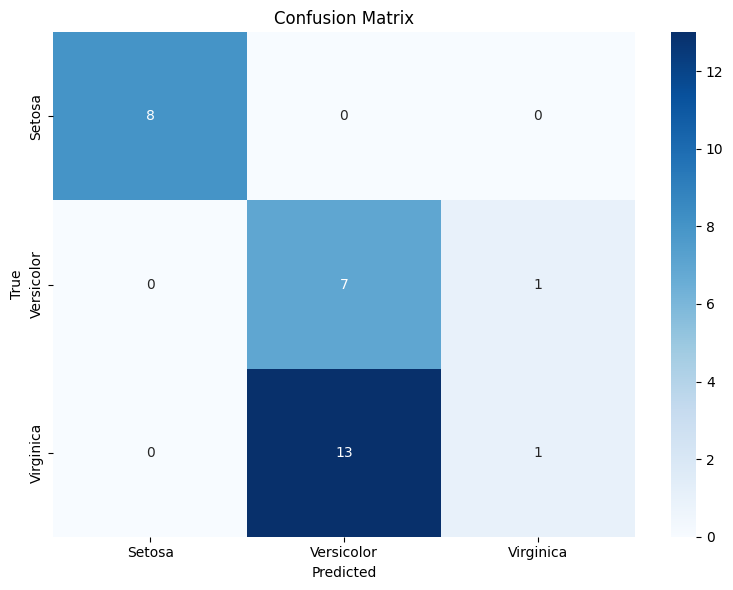


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.35      0.88      0.50         8
   Virginica       0.50      0.07      0.12        14

    accuracy                           0.53        30
   macro avg       0.62      0.65      0.54        30
weighted avg       0.59      0.53      0.46        30



In [173]:
# Get predicted labels
_, y_eval = torch.max(y_eval, 1)

# Convert to numpy arrays
y_test_np = y_test.detach().numpy()
y_eval_np = y_eval.detach().numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_eval_np)
print(f"Test Accuracy: {accuracy:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test_np, y_eval_np)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_np, y_eval_np,
                          target_names=['Setosa', 'Versicolor', 'Virginica']))


In [174]:
# Giving a new data to the model and then predicting
new_iris = torch.tensor([5.9,3.0,5.1,1.0])
with torch.no_grad():
  op=model(new_iris)
op=op.argmax().item()
res=['setosa','versicolor','virginica'][op]
print(f'The iris is {res}')

The iris is versicolor


In [175]:
#saving the model
torch.save(model.state_dict(),'iris_classification_model')
#here the model weights are stored in a dictionary format

In [176]:
#loading the model
new_model=myModel()
new_model.load_state_dict(torch.load('iris_classification_model'))
#here when we are to load the model we are actually loading the weights - so the new model must have same architecture
#we do not load the whole model code - just the weights

<All keys matched successfully>

In [177]:
new_model.eval()
#making sure the compiler knows that model is in evaluation mode - not training mode

myModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)